# first I import the packages i used

In [106]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# import the data

In [107]:
# reading the csv file
data=pd.read_csv("C:/Users/Mega Store/Desktop/DSM project/data.csv")

# display the data

In [108]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [110]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# data cleaning and preprocessing

In [111]:
#check for null values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [112]:
#check for duplicates
data.duplicated().sum()

0

In [113]:
#check if there are any errors in data like column have negative values that shouldn't have
data =data[(data['Weekly_Sales']>0)]
data =data[(data['Fuel_Price']>0)]
data =data[(data['CPI']>0)]
data =data[data['Holiday_Flag'].isin([0, 1])]
data =data[data['Unemployment']>0]

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [115]:
#replace any / with - to solve the inconsistency of date column
data['Date']=data['Date'].str.replace('/','-')

In [116]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [117]:
#change the date column to datetime
PRESENT = dt.datetime(2013,1,1)
data['Date'] = pd.to_datetime(data['Date'],format="%d-%m-%Y")

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [119]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


# visualize quantitative variables distributions

from the next histograms and box plots views:
we can say that temperature , unemployment and fuel price are  symmetric
in CPI it is like it has two peaks so it said to be bimodel

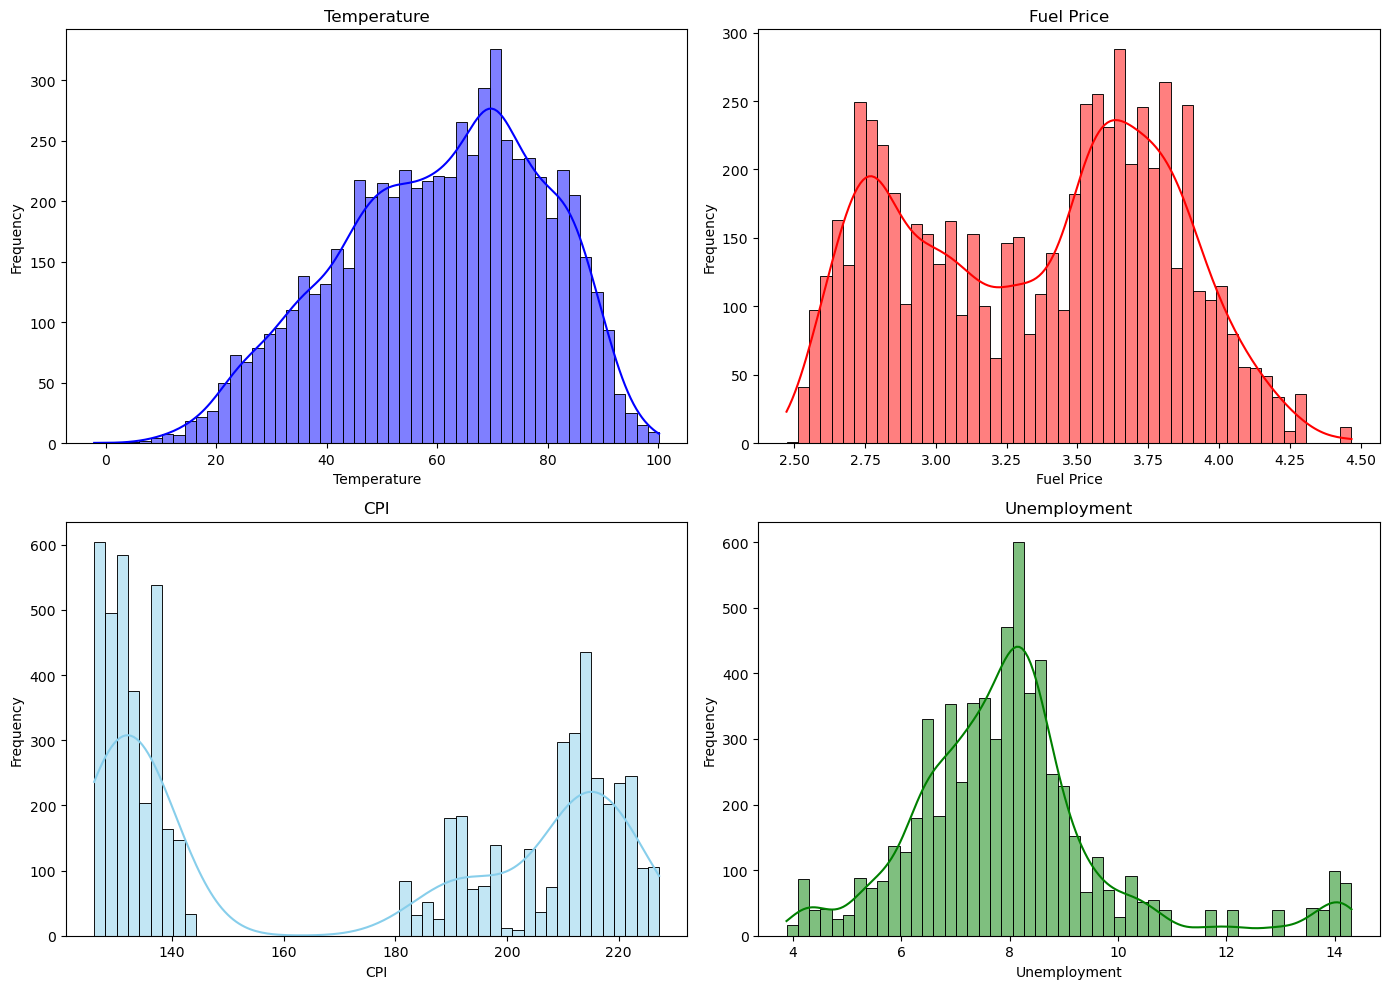

In [120]:
plt.figure(figsize=(14, 10))
# Temperature (Histogram with KDE)
plt.subplot(2, 2, 1)
sns.histplot(data['Temperature'], bins=50, kde=True, color='blue', edgecolor='black')
plt.title('Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Fuel Price (Histogram with KDE)
plt.subplot(2, 2, 2)
sns.histplot(data['Fuel_Price'], bins=50, kde=True, color='red', edgecolor='black')
plt.title('Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')

# CPI (Histogram with KDE)
plt.subplot(2, 2, 3)
sns.histplot(data['CPI'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('CPI')
plt.xlabel('CPI')
plt.ylabel('Frequency')

# Unemployment (Histogram with KDE)
plt.subplot(2, 2, 4)
sns.histplot(data['Unemployment'], bins=50, kde=True, color='green', edgecolor='black')
plt.title('Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


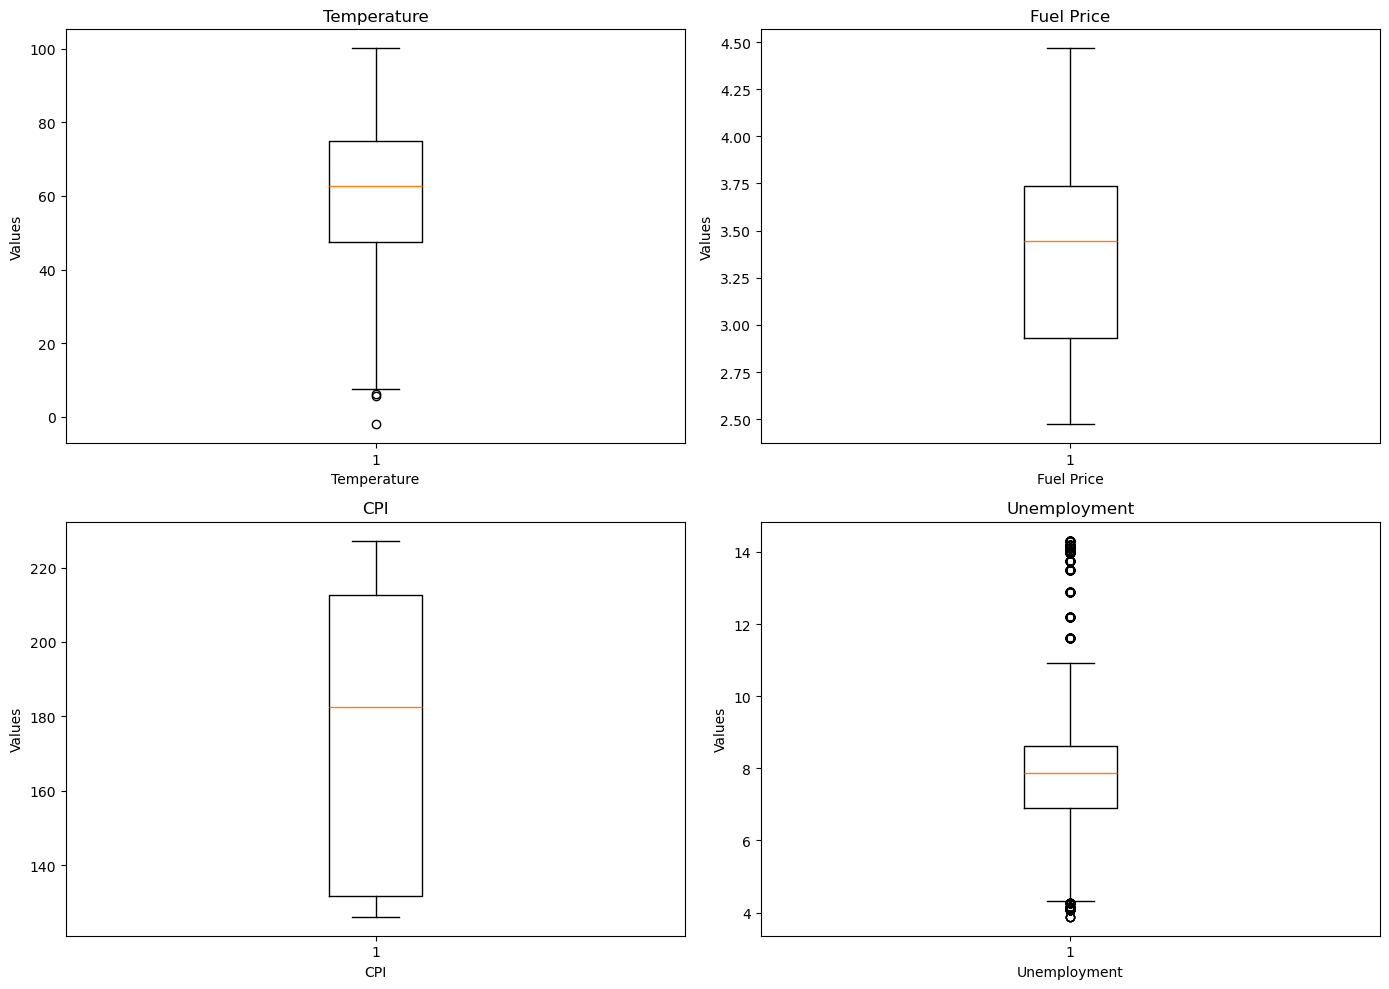

In [121]:
plt.figure(figsize=(14, 10))

# Weekly Sales vs. Temperature (Boxplot)
plt.subplot(2, 2, 1) # 2nd subplot
plt.boxplot(data['Temperature'])
plt.title('Temperature')
plt.xlabel('Temperature')
plt.ylabel('Values')

# Weekly Sales vs. Fuel Price (Boxplot)
plt.subplot(2, 2, 2) # 3rd subplot
plt.boxplot(data['Fuel_Price'])
plt.title('Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Values')

# Weekly Sales vs. CPI (Boxplot)
plt.subplot(2, 2, 3) # 4th subplot
plt.boxplot(data['CPI'])
plt.title('CPI')
plt.xlabel('CPI')
plt.ylabel('Values')

# Weekly Sales vs. Unemployment (Boxplot)
plt.subplot(2, 2, 4) # 5th subplot
plt.boxplot(data['Unemployment'])
plt.title('Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Values')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [122]:
# Calculate the sum of Weekly_Sales for each store
rfm = data.groupby('Store').agg({'Weekly_Sales': lambda price: price.sum()})
# Calculate the standard deviation of Weekly_Sales for each store
std_dev = data.groupby('Store')['Weekly_Sales'].std().rename('Standard_Deviation')
# Merge the standard deviation into the rfm DataFrame
rfm = rfm.join(std_dev)
rfm= rfm.reset_index()

In [123]:
rfm

,Store,Weekly_Sales,Standard_Deviation
0,1,2.224028e+08,155980.767761
1,2,2.753824e+08,237683.694682
2,3,5.758674e+07,46319.631557
3,4,2.995440e+08,266201.442297
4,5,4.547569e+07,37737.965745
5,6,2.237561e+08,212525.855862
6,7,8.159828e+07,112585.469220
7,8,1.299512e+08,106280.829881
8,9,7.778922e+07,69028.666585
9,10,2.716177e+08,302262.062504


# Which store has maximum sales?

here i print highest 5 stores that has highest sales , and from that i conclude that store 20 has the maximum sales

In [124]:
print(rfm.sort_values('Weekly_Sales',ascending
=False).head())

    Store  Weekly_Sales  Standard_Deviation
19     20  3.013978e+08       275900.562742
3       4  2.995440e+08       266201.442297
13     14  2.889999e+08       317569.949476
12     13  2.865177e+08       265506.995776
1       2  2.753824e+08       237683.694682


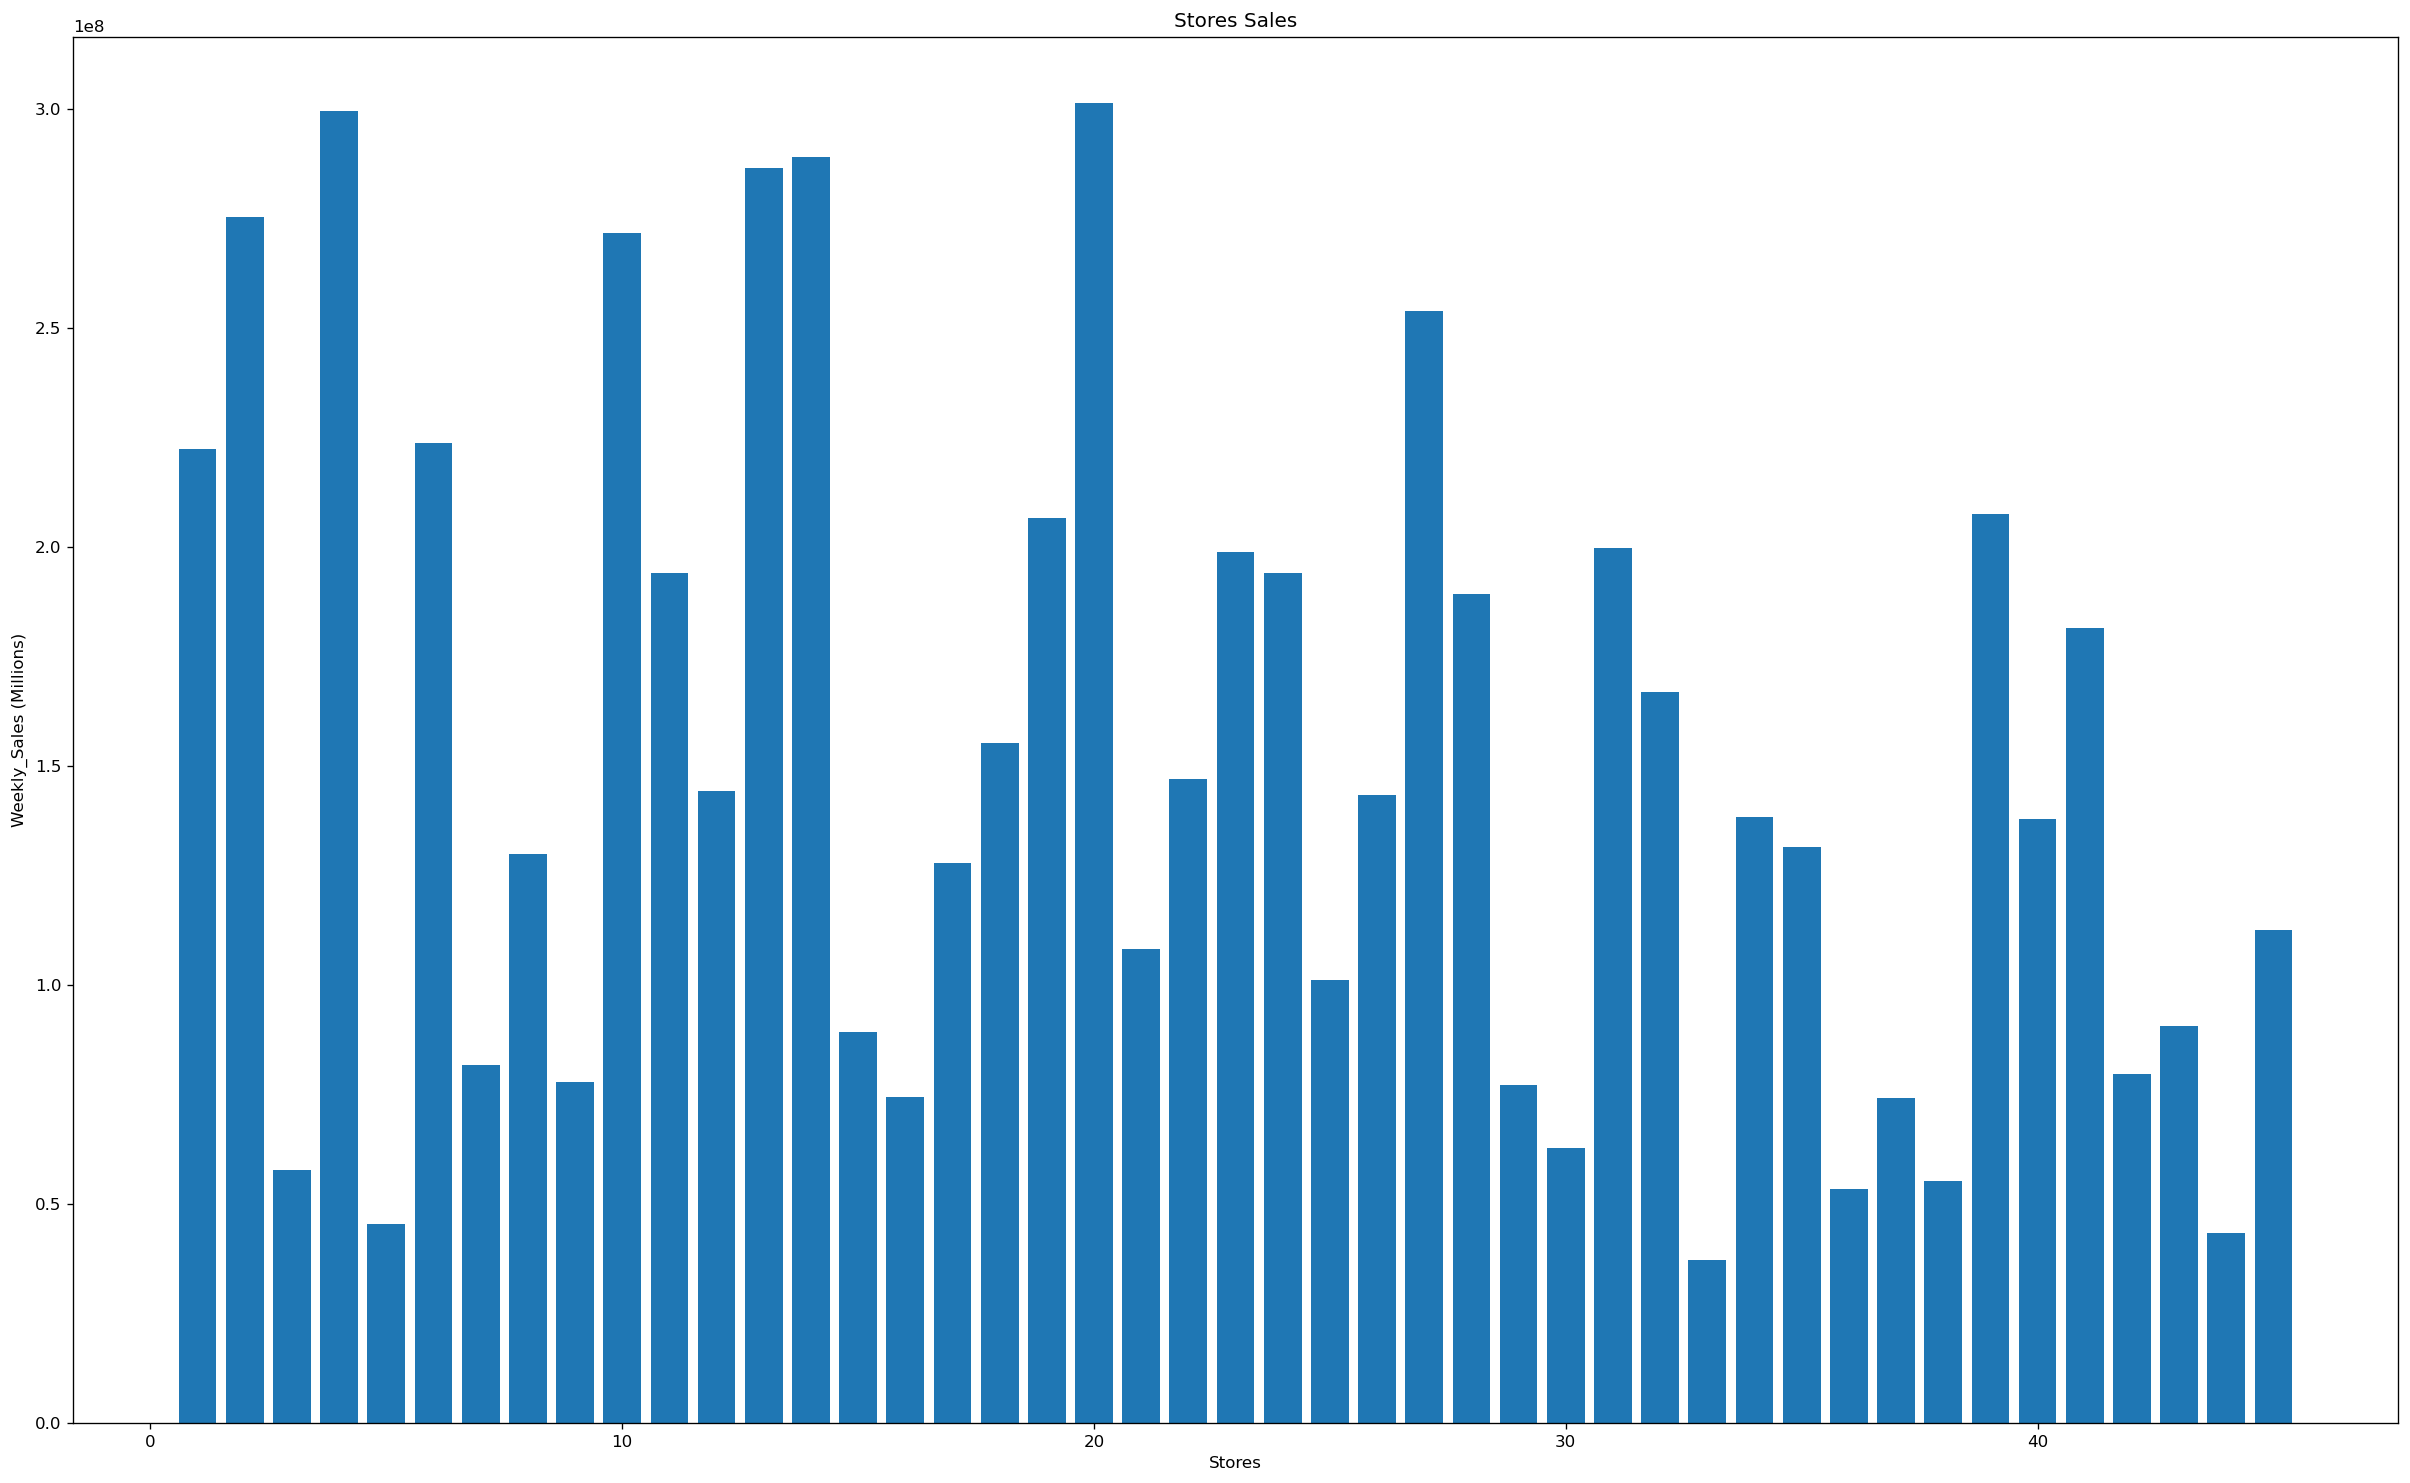

In [125]:
#a bar plot to show the total sales of each store
plt.figure(figsize=(25, 15), dpi=120)
plt.bar(rfm['Store'], rfm['Weekly_Sales'])
plt.xlabel('Stores')
plt.ylabel('Weekly_Sales (Millions)')  
plt.title('Stores Sales')
plt.show()


# Which store has maximum standard deviation? 

here i print highest 5 stores that has highest standard deviation ,
and from that i conclude that store 14 has the maximum standard deviation 

In [126]:
print(rfm.sort_values('Standard_Deviation',ascending
=False).head())

    Store  Weekly_Sales  Standard_Deviation
13     14  2.889999e+08       317569.949476
9      10  2.716177e+08       302262.062504
19     20  3.013978e+08       275900.562742
3       4  2.995440e+08       266201.442297
12     13  2.865177e+08       265506.995776


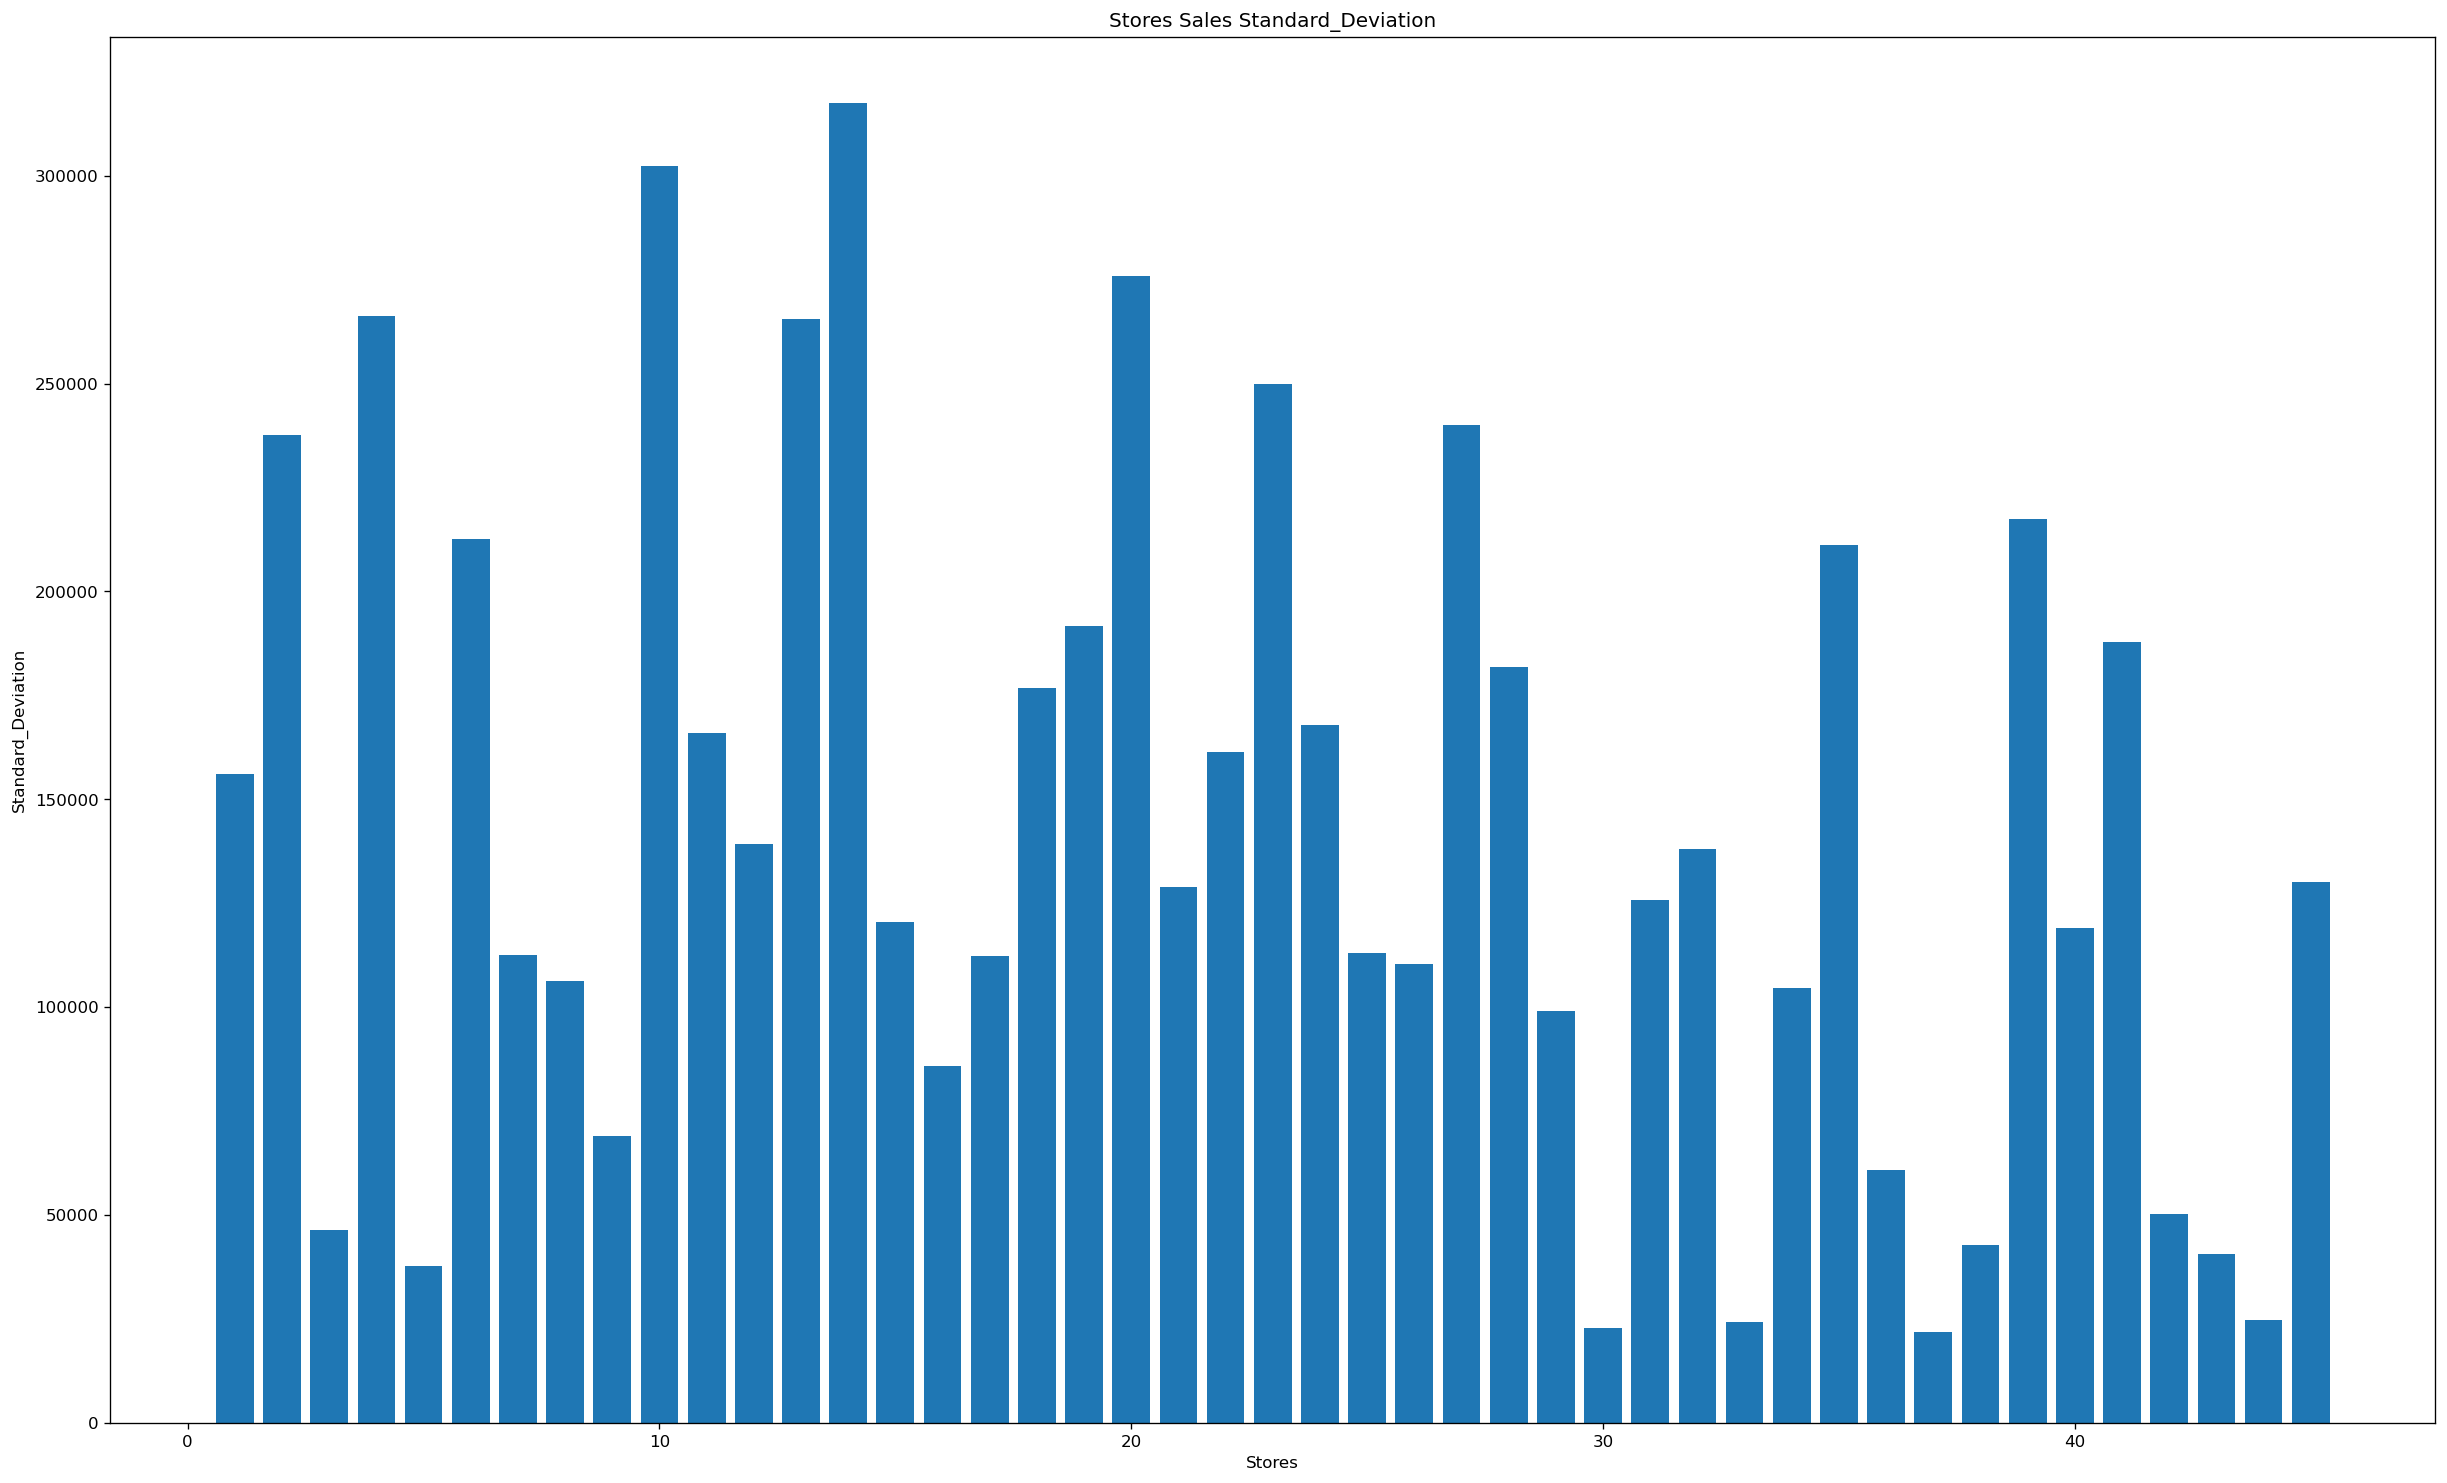

In [127]:
#a bar plot to show the Standard_Deviation of each store
plt.figure(figsize=(25, 15), dpi=120)
plt.bar(rfm['Store'], rfm['Standard_Deviation'])
plt.xlabel('Stores')
plt.ylabel('Standard_Deviation')  # Explicitly mention the unit
plt.title('Stores Sales Standard_Deviation')
plt.show()


In [128]:
#print the holidaysto 
holiday_data = data[data['Holiday_Flag'] == 1]
unique_holiday_dates = holiday_data['Date'].unique()
print(unique_holiday_dates)

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]


holidays that have higher sales than the mean sales in the non-holiday season for all stores together.

after knowing the holidays,i put this days to each event it relates, any day in december is for christmas
in november is for thankgiving, in September for labour_day and in february is for super_bowl

In [129]:
super_bowl=['2010-02-12', '2011-02-11', '2012-02-10']
labour_day=['2010-9-18','2011-9-9','2012-9-7']
thankgiving=['2010-11-26','2011-11-25']
christmas=['2010-12-31','2011-12-30']
#calculate the mean of each holiday event and non_holiday sales
non_holiday_sales=data[data['Holiday_Flag']==0]['Weekly_Sales'].mean().round(2)
super_bowl_sales=data[data['Date'].isin(super_bowl)]['Weekly_Sales'].mean().round(2)
labour_day_sales=data[data['Date'].isin(labour_day)]['Weekly_Sales'].mean().round(2)
thankgiving_sales=data[data['Date'].isin(thankgiving)]['Weekly_Sales'].mean().round(2)
christmas_sales=data[data['Date'].isin(christmas)]['Weekly_Sales'].mean().round(2)
#--------------------------------------------------------------------------------------------
#calculate the sum of each holiday event and non_holiday sales
non_holiday_sales_total=data[data['Holiday_Flag']==0]['Weekly_Sales'].sum().round(2)
super_bowl_sales_total=data[data['Date'].isin(super_bowl)]['Weekly_Sales'].sum().round(2)
labour_day_sales_total=data[data['Date'].isin(labour_day)]['Weekly_Sales'].sum().round(2)
thankgiving_sales_total=data[data['Date'].isin(thankgiving)]['Weekly_Sales'].sum().round(2)
christmas_sales_total=data[data['Date'].isin(christmas)]['Weekly_Sales'].sum().round(2)

after showing the mean sales of each holiday event and non_holiday ,i conclude that super_bowl and labour_day and thankgiving
have higher mean sales than non_holiday

In [130]:
print('super_bowl_sales:',super_bowl_sales)
print('labour_day_sales:',labour_day_sales)
print('thankgiving_sales:',thankgiving_sales)
print('christmas_sales:',christmas_sales)
print('non_holiday_sales:',non_holiday_sales)
print("-----------------------------------------------------------------------------")
# print('super_bowl_sales_total:',super_bowl_sales_total)
# print('labour_day_sales_total:',labour_day_sales_total)
# print('thankgiving_sales_total:',thankgiving_sales_total)
# print('christmas_sales_total:',christmas_sales_total)
# print('non_holiday_sales_total:',non_holiday_sales_total)

super_bowl_sales: 1079127.99
labour_day_sales: 1056592.08
thankgiving_sales: 1471273.43
christmas_sales: 960833.11
non_holiday_sales: 1041256.38
-----------------------------------------------------------------------------


# monthly view of sales in units 

first sales of monthwise sales of the three years together
then sales of each year only
from views :
december has highest sales and january is the lowest
sales in months that have holiday events like months 12,11,2 seem that they have higher Weekly_sales than the months near them, like month 2 has higher Weekly Sales than months 1 and 3

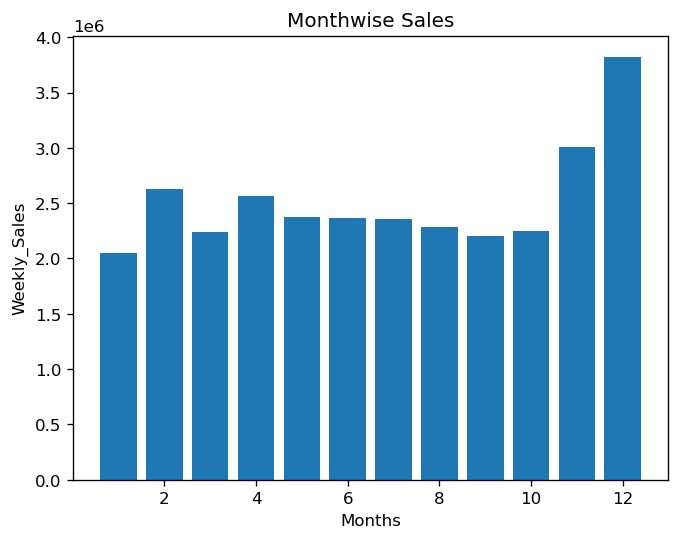

In [131]:
plt.figure(figure=(25,15), dpi=120)
plt.bar(data['Date'].dt.month,data['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthwise Sales')
plt.show()

here there wasn't any data for first monthof 2010, we can indcate from the view that month 12 has the highest sales

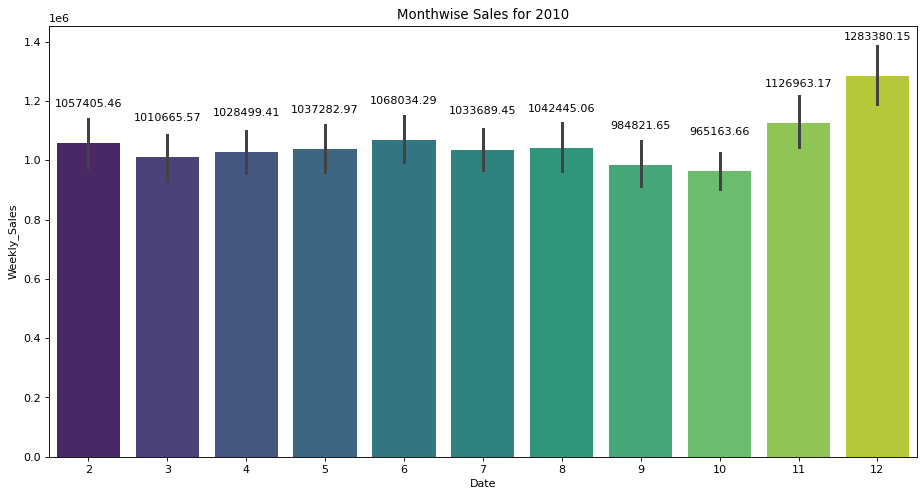

In [132]:
# Sales for the Year - 2010
data_2010 = data[data['Date'].dt.year == 2010]
months = data_2010['Date'].dt.month
plt.figure(figsize=(14,7), dpi=80)
# Use a palette to change the colors
graph1 = sns.barplot(x=months, y=data_2010['Weekly_Sales'], palette='viridis')
graph1.set(title='Monthwise Sales for 2010')

for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 35), textcoords = 'offset points')

here month 12 is highest and first month is the lowest sales

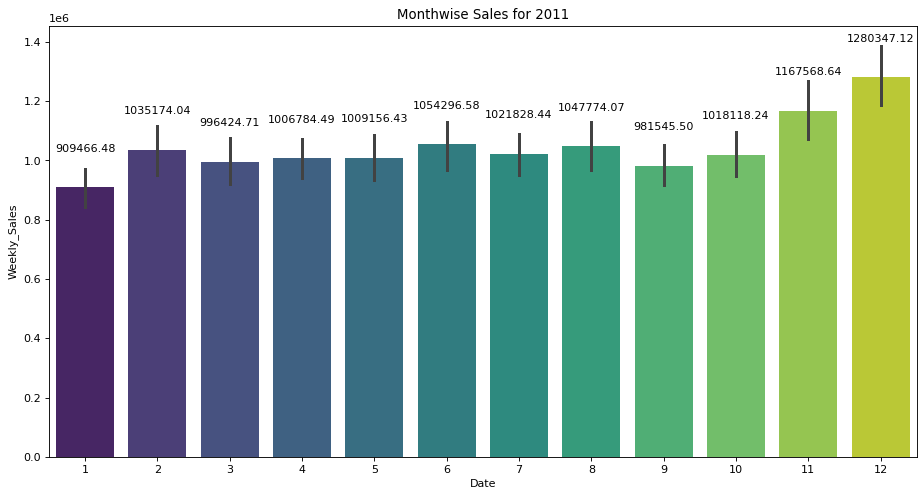

In [133]:
# Sales for the Year - 2011
data_2011 = data[data['Date'].dt.year == 2011]
months = data_2011['Date'].dt.month
plt.figure(figsize=(14,7), dpi=80)
graph1 = sns.barplot(x=months, y=data_2011['Weekly_Sales'], palette='viridis')
graph1.set(title='Monthwise Sales for 2011')

for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 35), textcoords = 'offset points')

from the dataset , there wasn't data of months 11,12 in 2012, here month 6 was highest sales in 2012 and month 1 has lowest sales

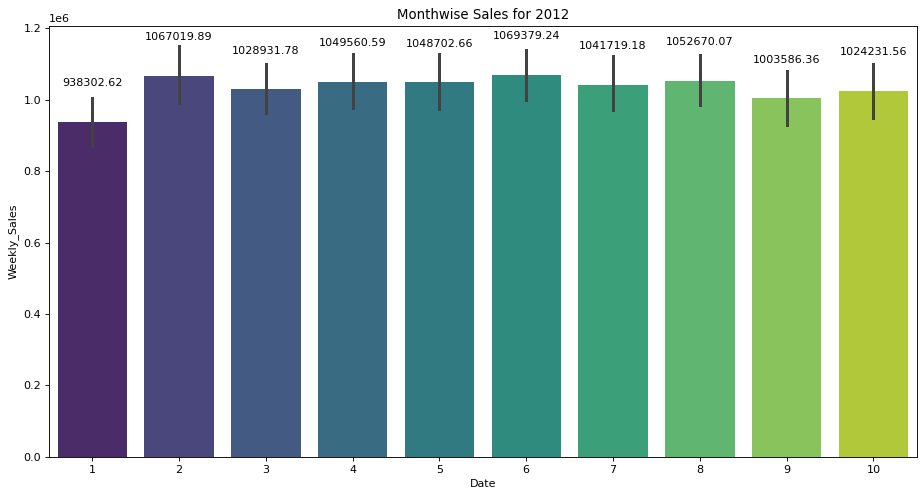

In [134]:
# Sales for the Year - 2012
data_2012 = data[data['Date'].dt.year == 2012]
months = data_2012['Date'].dt.month
plt.figure(figsize=(14,7), dpi=80)
graph1 = sns.barplot(x=months, y=data_2012['Weekly_Sales'], palette='viridis')
graph1.set(title='Monthwise Sales for 2012')

for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 35), textcoords = 'offset points')

# semester view of sales in units

i assign first six months to first semester and rest for the second semester
from the views :
in general semester 2 has higher sales than first, one of reasons that summer comes in the second semester which sales increase 

In [135]:
def map_to_semester(month):
    if month in [1, 2, 3, 4, 5, 6]:
        return 'Semester 1'
    else:
        return 'Semester 2'

data['Semester'] = data['Date'].dt.month.apply(map_to_semester)
semester_sales = data.groupby('Semester')['Weekly_Sales'].sum()

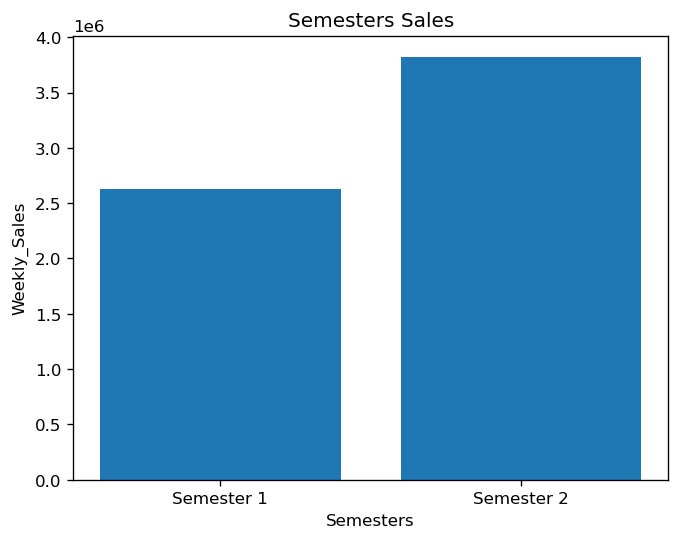

In [136]:
plt.figure(figure=(25,15), dpi=120)
plt.bar(data['Semester'],data['Weekly_Sales'])
plt.xlabel('Semesters')
plt.ylabel('Weekly_Sales')
plt.title('Semesters Sales')
plt.show()

as we know that in general semester 2 has higher sales than semester 1, but in 2012 there wasn't data about months 11,12 so the
sales has decreased in semester 2 in 2012

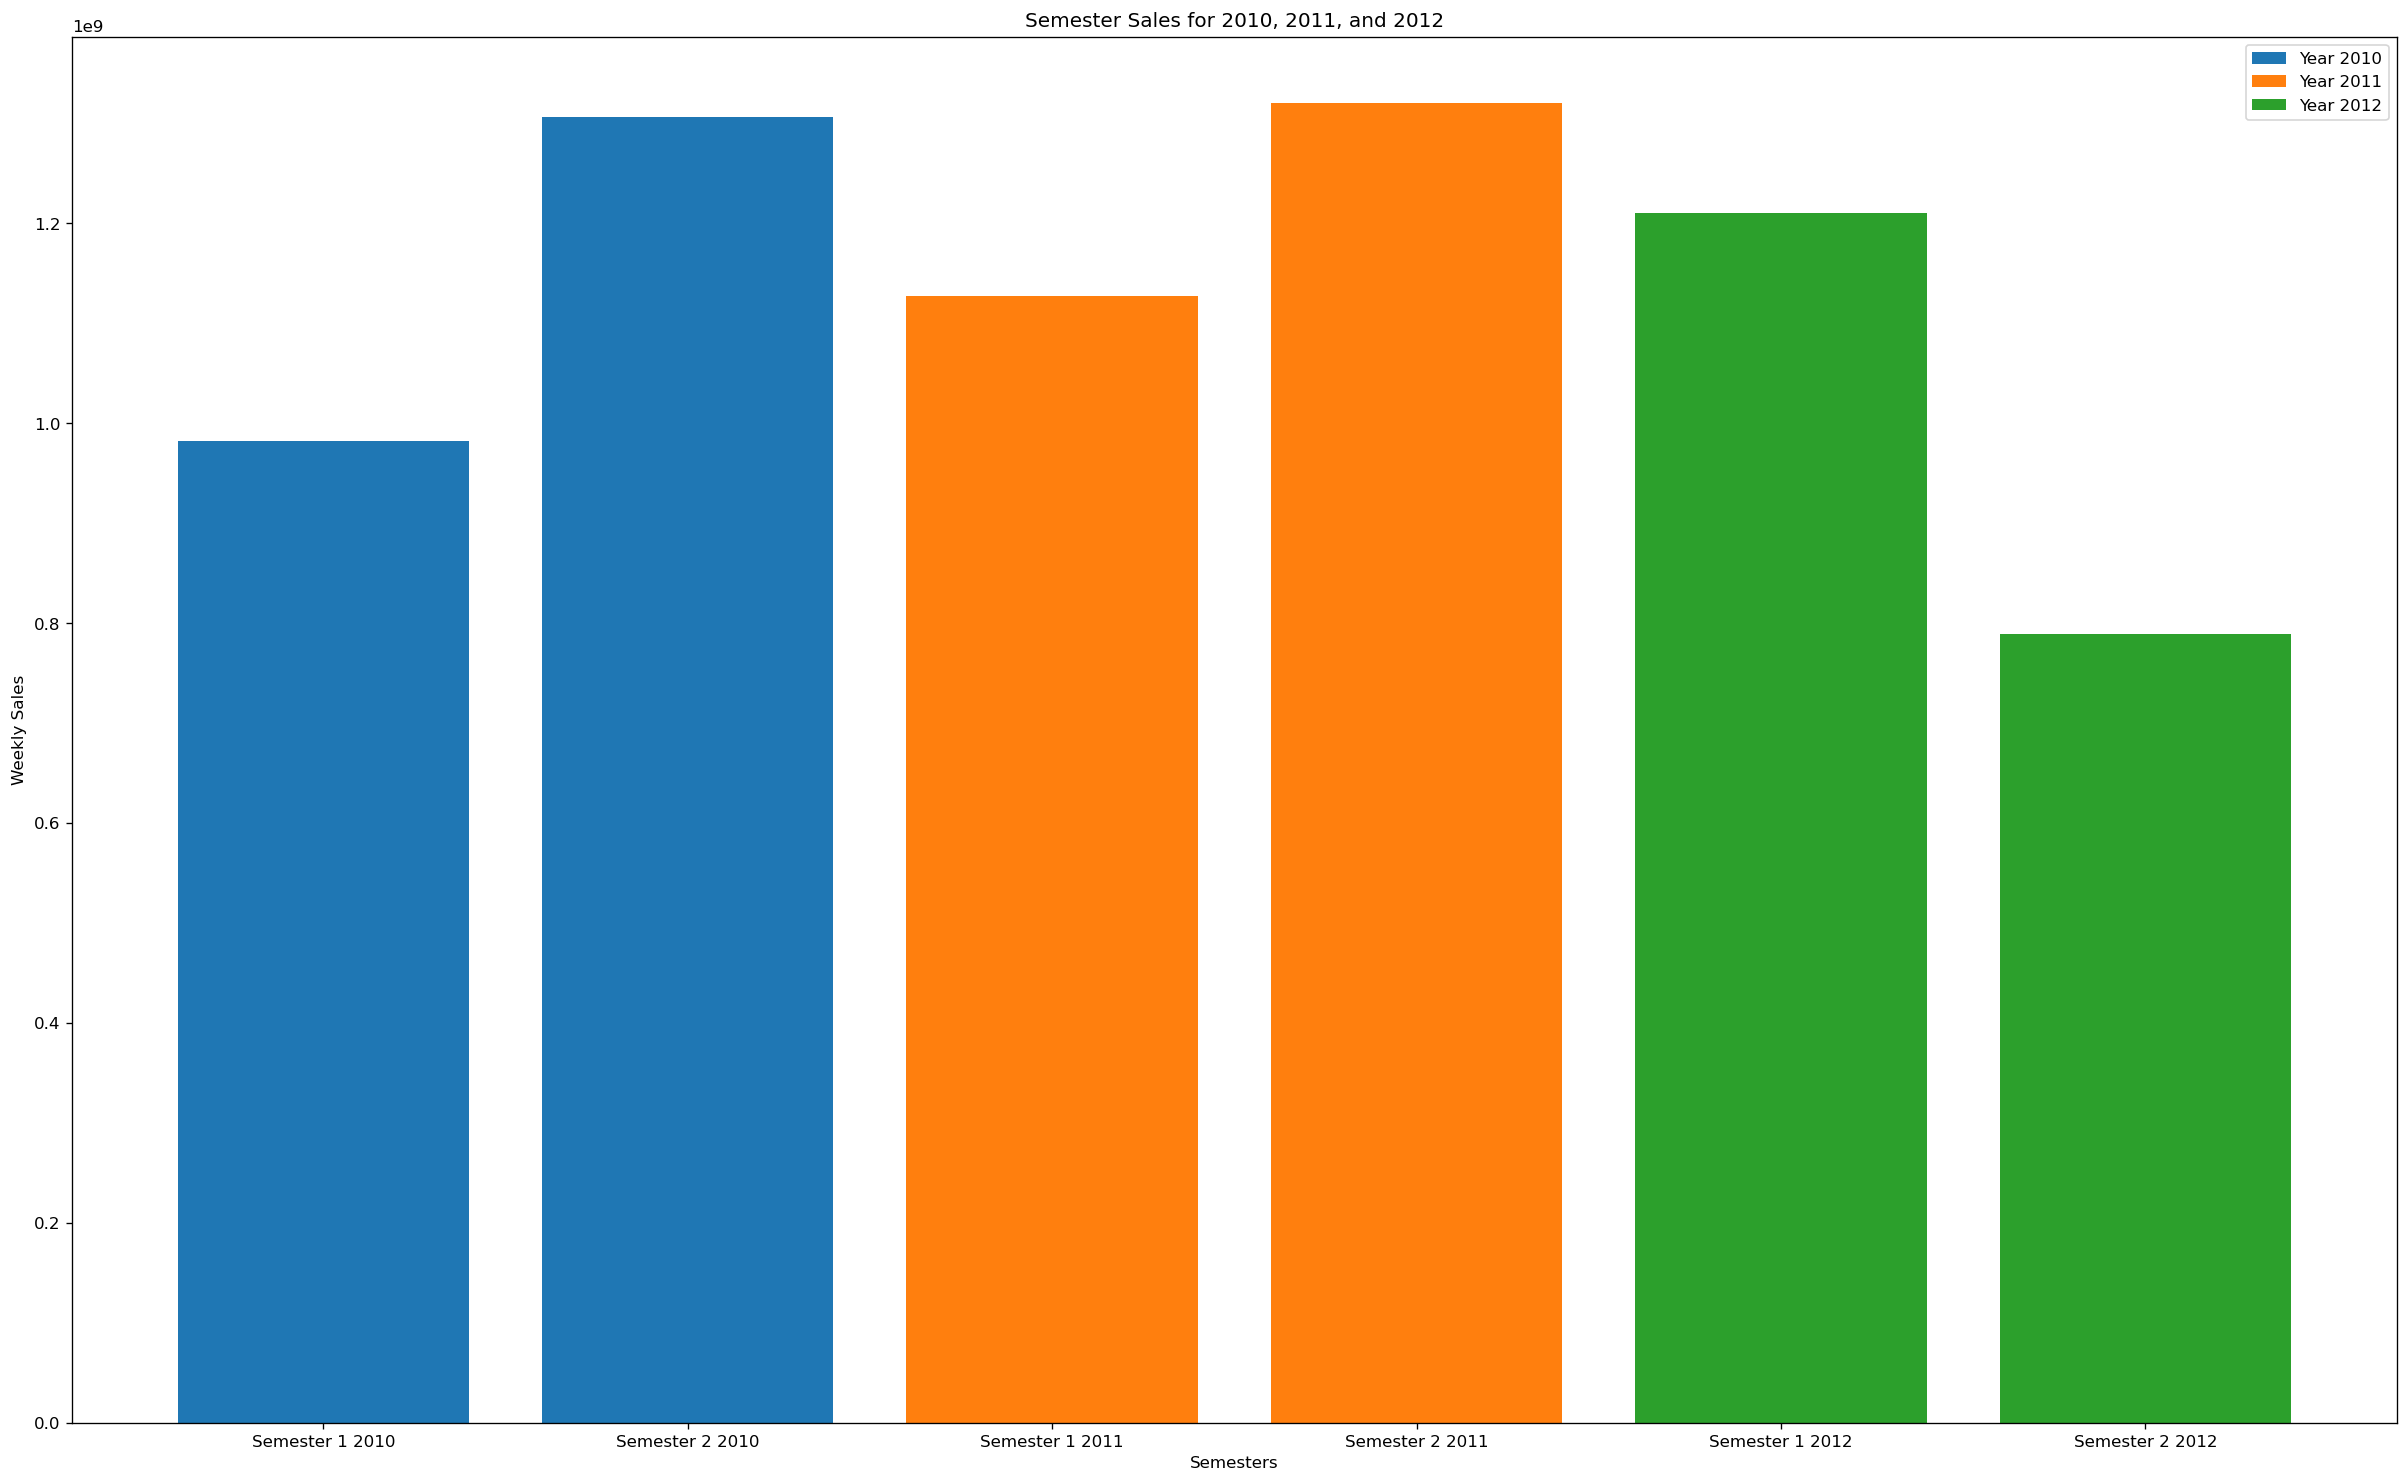

In [137]:
data['Year'] = data['Date'].dt.year
filtered_data = data[data['Year'].isin([2010, 2011, 2012])]
# Group the data by Year and Semester and sum the Weekly_Sales
semester_sales = filtered_data.groupby(['Year', 'Semester'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(25, 15), dpi=120)
for year in [2010, 2011, 2012]:
    yearly_data = semester_sales[semester_sales['Year'] == year]
    plt.bar(yearly_data['Semester'] + ' ' + yearly_data['Year'].astype(str),
            yearly_data['Weekly_Sales'], label=f'Year {year}')

plt.xlabel('Semesters')
plt.ylabel('Weekly Sales')
plt.title('Semester Sales for 2010, 2011, and 2012')
plt.legend()
plt.show()

In [138]:
semester_sales['Formatted_Weekly_Sales'] = semester_sales['Weekly_Sales'].apply(lambda x: f"{x:.0f}")
semester_sales

,Year,Semester,Weekly_Sales,Formatted_Weekly_Sales
0,2010,Semester 1,9.826223e+08,982622260
1,2010,Semester 2,1.306264e+09,1306263860
2,2011,Semester 1,1.127340e+09,1127339797
3,2011,Semester 2,1.320860e+09,1320860210
4,2012,Semester 1,1.210765e+09,1210765416
5,2012,Semester 2,7.893674e+08,789367443


# relations between weekly sales vs. other numeric features 

from the next scatter plots and bar plots i conclude:

Temperature: sales increase between the range 30-60 where is the temperature is suitable for customers.

Fuel_price: sales increase between the range 2.75 and 4.00, but if fuel_price exceeds the range the sales starts to decrease.

CPI: there is no fixed relation or correlation between Weekly_sales and CPI,between 142 and 180 the sales Almost non-existents , consumers may adjust their spending habits. They might become more cautious, leading to reduced weekly sales or Other market conditions (e.g., unemployment rates, fuel prices) could also influence sales during this CPI range, They may rethink their purchasing decisions and adjust their behavior based on changing prices.

Unemployment: High unemployment rates can lead to reduced consumer confidence, which impacts retail sales, like if many don't have jobs , they can't afford their requirements ,then their purchase will decrease and that lead to decrease of sales too.

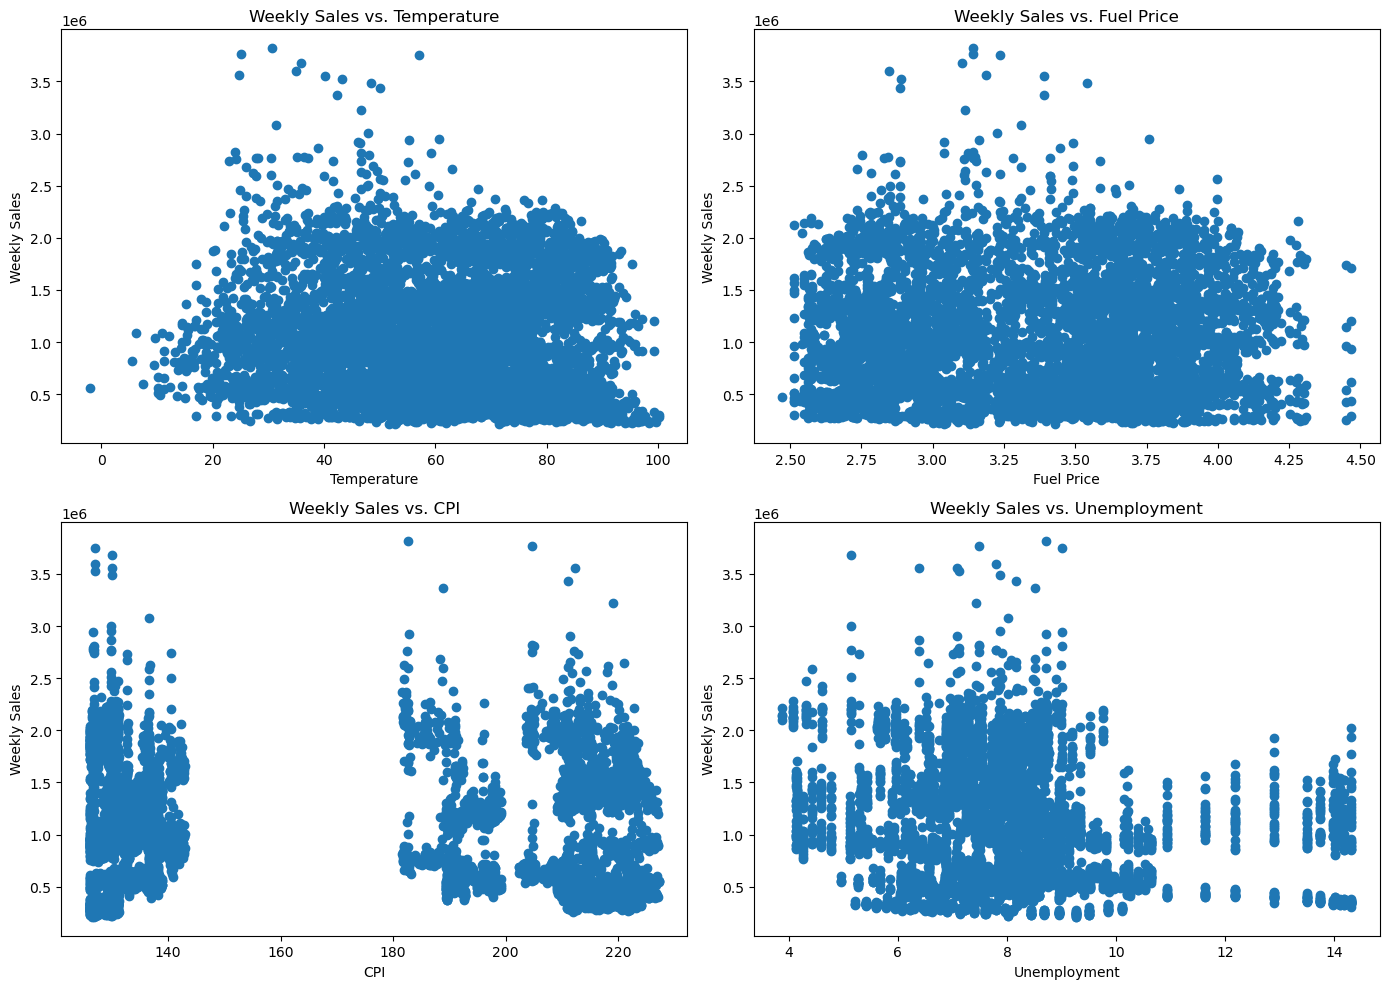

In [139]:
plt.figure(figsize=(14, 10))

# Weekly Sales vs. Temperature
plt.subplot(2, 2, 1) 
plt.scatter(data['Temperature'], data['Weekly_Sales'])
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')

# Weekly Sales vs. Fuel Price
plt.subplot(2, 2, 2)
plt.scatter(data['Fuel_Price'], data['Weekly_Sales'])
plt.title('Weekly Sales vs. Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')

# Weekly Sales vs. CPI
plt.subplot(2, 2, 3) 
plt.scatter(data['CPI'], data['Weekly_Sales'])
plt.title('Weekly Sales vs. CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')

# Weekly Sales vs. Unemployment
plt.subplot(2, 2, 4) 
plt.scatter(data['Unemployment'], data['Weekly_Sales'])
plt.title('Weekly Sales vs. Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


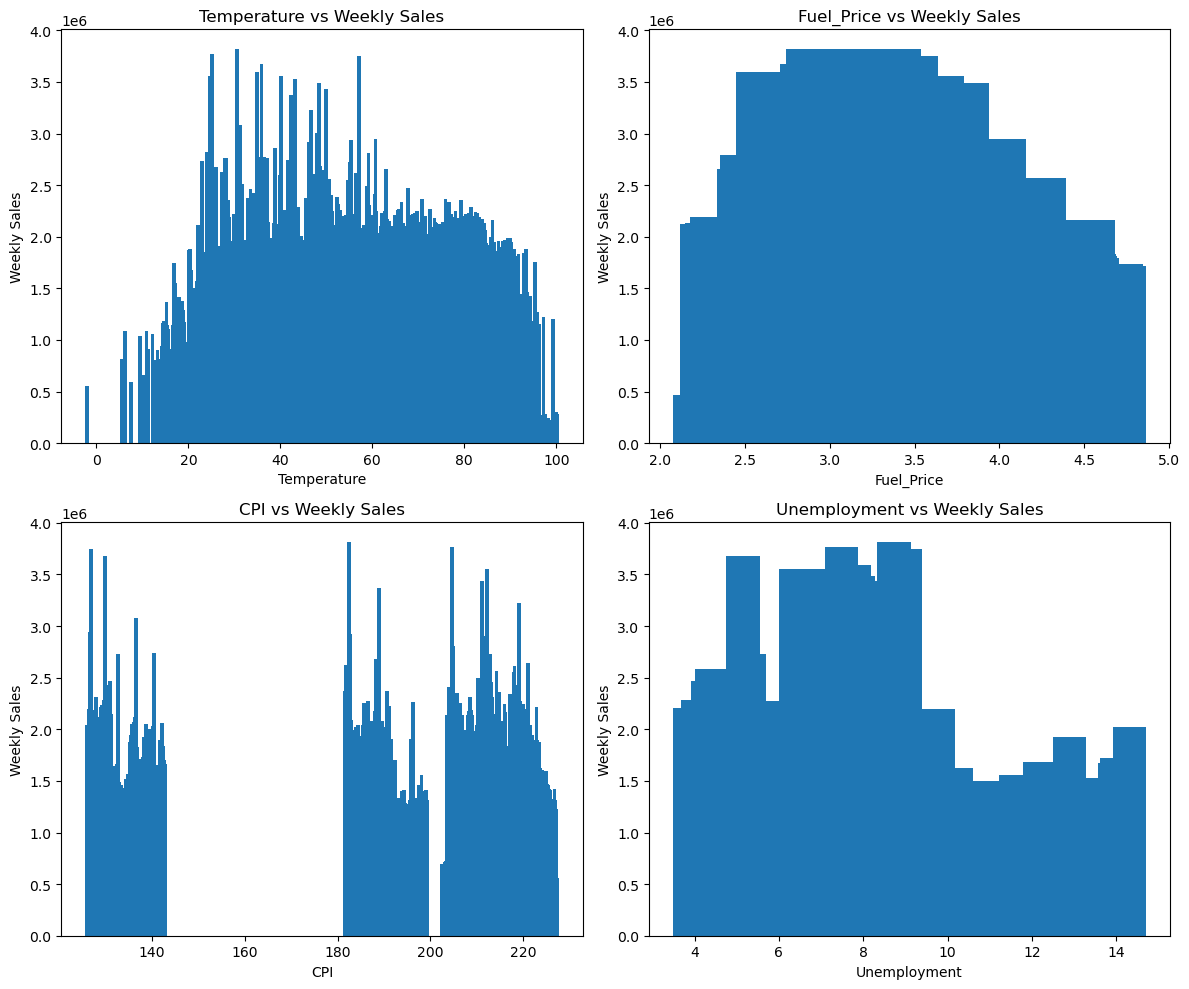

In [140]:
# Create a 2x2 grid of subplots
plt.figure(figsize=(12, 10))

# Temperature vs Weekly Sales
plt.subplot(2, 2, 1)
plt.bar(data['Temperature'], data['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs Weekly Sales')

# Fuel Price vs Weekly Sales
plt.subplot(2, 2, 2)
plt.bar(data['Fuel_Price'], data['Weekly_Sales'])
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly Sales')
plt.title('Fuel_Price vs Weekly Sales')

# CPI vs Weekly Sales
plt.subplot(2, 2, 3)
plt.bar(data['CPI'], data['Weekly_Sales'])
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('CPI vs Weekly Sales')

# Unemployment vs Weekly Sales
plt.subplot(2, 2, 4)
plt.bar(data['Unemployment'], data['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Unemployment vs Weekly Sales')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()
